# Module 03: EDA

In [3]:
# packages
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from sklearn.model_selection import train_test_split 
from ISLP import load_data

# set seed
seed = 2323

### We'll use the _Hitters_ data from ISLP for this activity. The metadata for _Hitters_ can be found [here](https://intro-stat-learning.github.io/ISLP/datasets/Hitters.html).

In [4]:
# Load the data
Hitters = load_data('Hitters')

### Determine the number of rows and columns in the dataset by returning its "shape" attribute

In [5]:
#fillin
Hitters.shape

(322, 20)

### Determine whether each feature is numeric or categorical by returning the "dtype" attribute for each column

In [22]:
Hitters.dtypes

AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League       category
Division     category
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague    category
AtBat_st      float64
dtype: object

### Before doing any other analyses, let's create training and test sets.

In [23]:
Train, Test = train_test_split(Hitters, 
                               random_state=seed, 
                               test_size=0.40, 
                               shuffle=True) 

### Based on the metadata, what is the difference between the 6 columns starting with 'C' and the 6 related columns that don't?

#fillin Type your answer here

The columns starting with with C are for data concerning a player's entire career as opposed to a general season.

### On the training set, create pairwise scatterplots for each of these 6 columns with the 'Salary' variable.

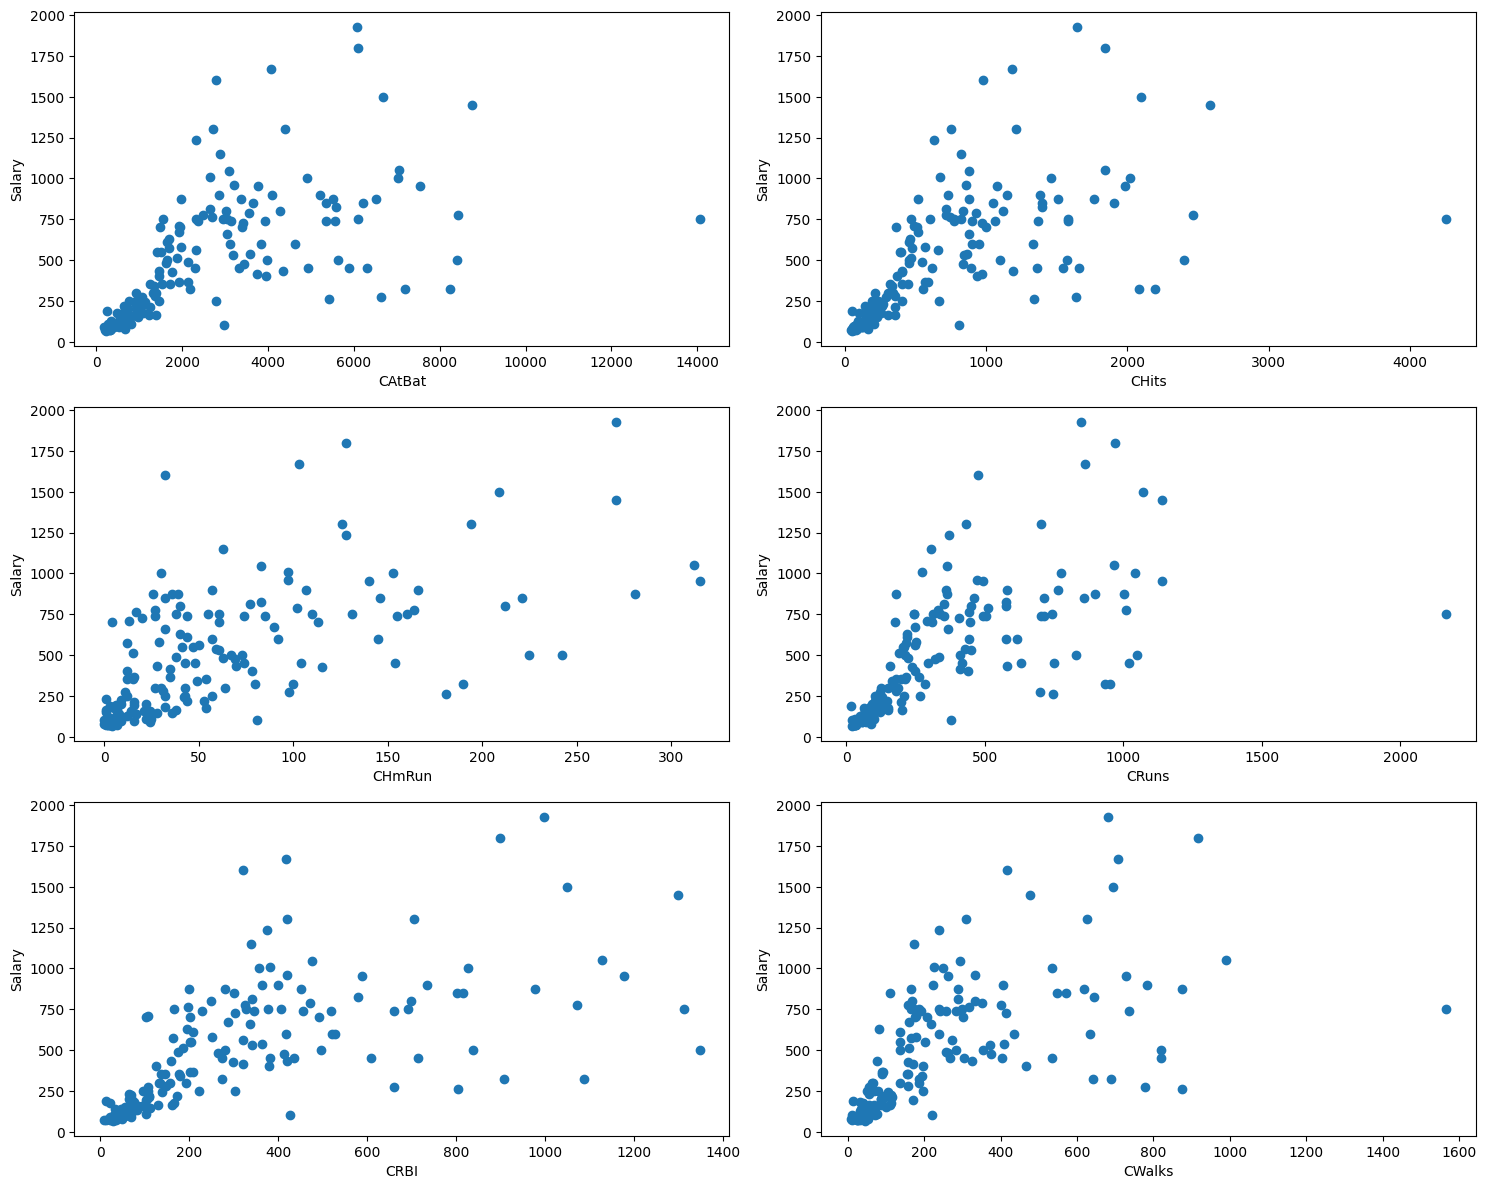

In [24]:
#fillin
nrows = 3
ncols = 2
figsize = (5*nrows, 6*ncols)
features = ["CAtBat", "CHits", "CHmRun", "CRuns", "CRBI", "CWalks"]

fig, axes = plt.subplots(nrows=nrows,
                     ncols=ncols,
                     figsize=figsize)

# Assign a grid location to each index
def range_to_grid(i, nrows, ncols):
    return i // ncols, i % ncols

# Plot the variables
for j, col in enumerate(features):
    r, c = range_to_grid(j, nrows, ncols)
    axes[r, c].scatter(Train[col], Train["Salary"])
    axes[r, c].set_xlabel(col)
    axes[r, c].set_ylabel("Salary")

plt.tight_layout()
plt.show()

### Use the "describe" method to determine the mean, standard deviation, and 5 number summary of all numeric variables in the training subset of _Hitters_.

In [25]:
#fillin
Train.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,AtBat_st
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,164.000000,193.000000
mean,381.829016,101.549223,10.150259,50.751295,47.093264,38.445596,7.253886,2587.440415,702.222798,59.668394,345.378238,308.373057,248.388601,276.865285,105.300518,8.051813,493.032951,0.005870
std,145.679181,44.267521,8.228711,24.784284,24.912589,21.136915,4.858712,2285.947344,649.010165,66.449102,322.848870,297.885894,250.777436,262.957701,137.135778,6.783667,386.159522,0.949638
min,19.000000,7.000000,0.000000,1.000000,2.000000,1.000000,1.000000,41.000000,13.000000,0.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,67.500000,-2.359301
25%,271.000000,68.000000,4.000000,32.000000,29.000000,22.000000,3.000000,730.000000,185.000000,14.000000,98.000000,82.000000,63.000000,109.000000,7.000000,3.000000,160.000000,-0.716591
50%,369.000000,95.000000,8.000000,47.000000,43.000000,34.000000,6.000000,1876.000000,476.000000,36.000000,238.000000,202.000000,166.000000,211.000000,38.000000,6.000000,420.833500,-0.077759
75%,508.000000,136.000000,14.000000,68.000000,61.000000,53.000000,11.000000,3754.000000,1000.000000,78.000000,494.000000,419.000000,332.000000,317.000000,173.000000,12.000000,750.000000,0.828340
max,687.000000,223.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,315.000000,2165.000000,1348.000000,1566.000000,1320.000000,492.000000,32.000000,1925.571000,1.995186


### It looks like the mean and median of 'AtBat' are nearly equal. This _might_ suggest that this variable is normally distributed. Create a histogram of 'AtBat' to check this hypothesis.

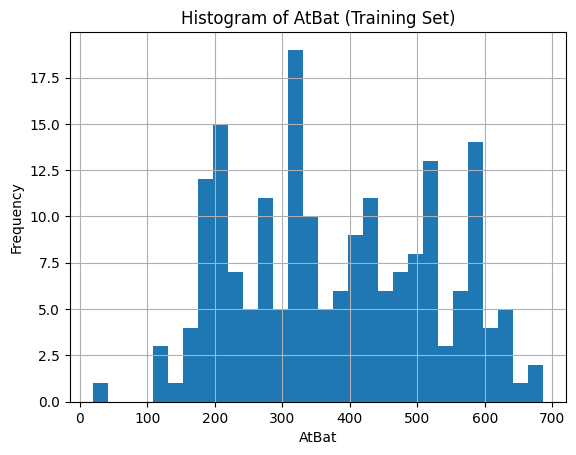

In [26]:
#fillin
Train["AtBat"].hist(bins=30)
plt.xlabel("AtBat")
plt.ylabel("Frequency")
plt.title("Histogram of AtBat (Training Set)")
plt.show()

### Let's standardize the AtBat feature (i.e., normalize by z-scores). We'll create a new column in the training data called 'AtBat_st' to represent this.

In [67]:
#fillin
Train["AtBat_st"] = (Train["AtBat"] - Train["AtBat"].mean())/Train["AtBat"].std()
Train.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,AtBat_st,AVG
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,164.000000,1.930000e+02,193.000000
mean,381.829016,101.549223,10.150259,50.751295,47.093264,38.445596,7.253886,2587.440415,702.222798,59.668394,345.378238,308.373057,248.388601,276.865285,105.300518,8.051813,493.032951,-2.761176e-17,0.262687
std,145.679181,44.267521,8.228711,24.784284,24.912589,21.136915,4.858712,2285.947344,649.010165,66.449102,322.848870,297.885894,250.777436,262.957701,137.135778,6.783667,386.159522,1.000000e+00,0.030834
min,19.000000,7.000000,0.000000,1.000000,2.000000,1.000000,1.000000,41.000000,13.000000,0.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,67.500000,-2.490603e+00,0.193717
25%,271.000000,68.000000,4.000000,32.000000,29.000000,22.000000,3.000000,730.000000,185.000000,14.000000,98.000000,82.000000,63.000000,109.000000,7.000000,3.000000,160.000000,-7.607746e-01,0.242105
50%,369.000000,95.000000,8.000000,47.000000,43.000000,34.000000,6.000000,1876.000000,476.000000,36.000000,238.000000,202.000000,166.000000,211.000000,38.000000,6.000000,420.833500,-8.806348e-02,0.259939
75%,508.000000,136.000000,14.000000,68.000000,61.000000,53.000000,11.000000,3754.000000,1000.000000,78.000000,494.000000,419.000000,332.000000,317.000000,173.000000,12.000000,750.000000,8.660880e-01,0.280660
max,687.000000,223.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,315.000000,2165.000000,1348.000000,1566.000000,1320.000000,492.000000,32.000000,1925.571000,2.094815e+00,0.368421


### How many rows have an 'AtBat' value within the first standard deviation?

Hint: the 'len' magic method returns the number of rows of a dataFrame.

In [37]:
#fillin
within_1sd = Train[
    (Train["AtBat_st"] >= -1) & (Train["AtBat_st"] <= 1)
]

within_1sd.shape[0]

119

### Going back to the results of the 'describe' method, how can you tell that the 'Salary' variable has missing values?

#fillin Type your answer here.

The count for all other variables is 193 but for Salary, its 164. That means there are 29 missing values for salary.

### Describe a situation where a variable could have missing values but this would not be reflected in the results of the 'describe' method.

#fillin Type your answer here.

If you decided to fill in the missing values with something like 0 or 99999 or "N/A", the describe method would include those in the count for the variable.

### On the training data, create separate boxplots of the 'AtBat' variable for when 'Salary' is populated or missing.

Text(0, 0.5, 'AtBat')

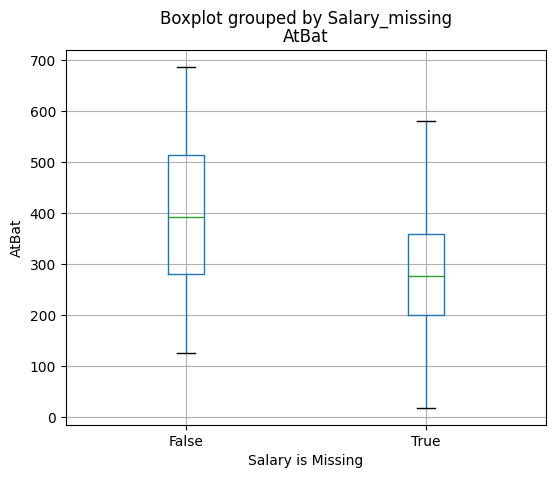

In [42]:
#fillin
Train["Salary_missing"] = Train["Salary"].isna()


Train.boxplot(
    column="AtBat",
    by="Salary_missing",
    figsize=(6,5)
)

plt.xlabel("Salary is Missing")
plt.ylabel("AtBat")

### Create a correlation matrix for all numeric features in the training set

In [43]:
#fillin
c_matrix = Train.select_dtypes(include="number").corr()
c_matrix

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,AtBat_st
AtBat,1.000000,0.963324,0.540323,0.906579,0.798717,0.631824,-0.039232,0.126602,0.146763,0.150166,0.164892,0.145779,0.056578,0.345879,0.363085,0.368162,0.401390,1.000000
Hits,0.963324,1.000000,0.516853,0.914739,0.795316,0.605876,-0.028717,0.133316,0.163329,0.136865,0.175542,0.153011,0.065178,0.312858,0.310422,0.301725,0.432558,0.963324
HmRun,0.540323,0.516853,1.000000,0.618439,0.840613,0.385425,0.009072,0.078981,0.076914,0.411917,0.110767,0.218285,0.080296,0.222084,-0.069088,0.062840,0.326021,0.540323
Runs,0.906579,0.914739,0.618439,1.000000,0.786635,0.711346,-0.069584,0.083770,0.103859,0.160979,0.159683,0.115628,0.099025,0.289952,0.184714,0.217297,0.441499,0.906579
RBI,0.798717,0.795316,0.840613,0.786635,1.000000,0.553527,0.046705,0.165837,0.180526,0.375072,0.191452,0.285074,0.117109,0.323825,0.138896,0.217983,0.414623,0.798717
Walks,0.631824,0.605876,0.385425,0.711346,0.553527,1.000000,0.037943,0.137157,0.147019,0.194766,0.205250,0.167453,0.312812,0.317000,0.139008,0.160753,0.458462,0.631824
Years,-0.039232,-0.028717,0.009072,-0.069584,0.046705,0.037943,1.000000,0.925308,0.906857,0.730478,0.882559,0.882835,0.836809,0.071301,-0.091915,-0.160476,0.541390,-0.039232
CAtBat,0.126602,0.133316,0.078981,0.083770,0.165837,0.137157,0.925308,1.000000,0.995185,0.775167,0.979705,0.948617,0.894573,0.120875,-0.000507,-0.068187,0.616677,0.126602
CHits,0.146763,0.163329,0.076914,0.103859,0.180526,0.147019,0.906857,0.995185,1.000000,0.761920,0.983128,0.945002,0.883547,0.132818,-0.003372,-0.062669,0.629875,0.146763
CHmRun,0.150166,0.136865,0.411917,0.160979,0.375072,0.194766,0.730478,0.775167,0.761920,1.000000,0.782490,0.912134,0.750795,0.126756,-0.129640,-0.141514,0.616170,0.150166


### Propose two different ways of imputing the missing values of Salary while taking advantage of the information given in the boxplots or the correlation matrix.

#fillin Type your answer here.

You could match the data points who are missing salary to the salary of another point with a similar features that show higher correlation to salary. This can be done using a linear regression model.

Another option is to sort the data into groups by their AtBat values and then give the missing salary data points the median salary value for the group that their AtBat belongs to.

### For our last exercise, we'll explore Hits and Walks relative to AtBat totals. 
- Use the sum function to calculuate the totals of each of these three variables for the 1986 season (on the training set). 
- Create a pie chart which shows total hits, total walks, and remaining total (neither) as percents of the At Bats total (on the training set). 

In [51]:
TotHits = Train["Hits"].sum()
TotWalks = Train["Walks"].sum()
TotAtBat = Train["AtBat"].sum()

Labels = ['Hits', 'Walks', 'Neither']
Totals = [TotHits, TotWalks, TotAtBat-TotHits-TotWalks]

19599


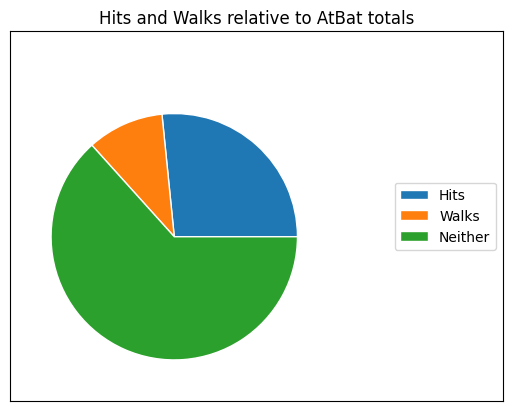

In [55]:
# pie chart
fig, ax = plt.subplots()

ax.pie(Totals, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.legend(Labels, loc="right")

ax.set(xlim=(0, 12), xticks=np.arange(1, 8),
       ylim=(0, 9), yticks=np.arange(1, 8))
ax.tick_params(left = False, labelleft = False, 
               bottom = False, labelbottom = False)
ax.set(title="Hits and Walks relative to AtBat totals")

plt.show()

### The previous two cells gave us totals across all players. For each player in the training set, calculate the Hits as a percent of AtBat and store it in a new variable called 'AVG'

In [58]:
#fillin
Train["AVG"] = Train["Hits"] / Train["AtBat"]


### Using 0.25 and 0.31 as the split points, create a new variable with three bins: high, medium, and low. 

In [61]:
Train['AVG_bin'] = 'medium'
Train.loc[Train["AVG"] < 0.25,'AVG_bin'] = 'low'
Train.loc[Train["AVG"] > 0.31, 'AVG_bin'] = 'high'

### Create a bar chart that displays the number of players in each of the low, medium, and high categories (for the training data).

In [62]:
Train['AVG_bin'].value_counts()

AVG_bin
medium    114
low        65
high       14
Name: count, dtype: int64

Notice that the order of the bars will be medium, low, high. That's counterintuitive. We can reorder these quickly. 

In [63]:
indexMap = ['low', 'medium', 'high']
reordered_list = [Train['AVG_bin'].value_counts()[i] for i in indexMap]

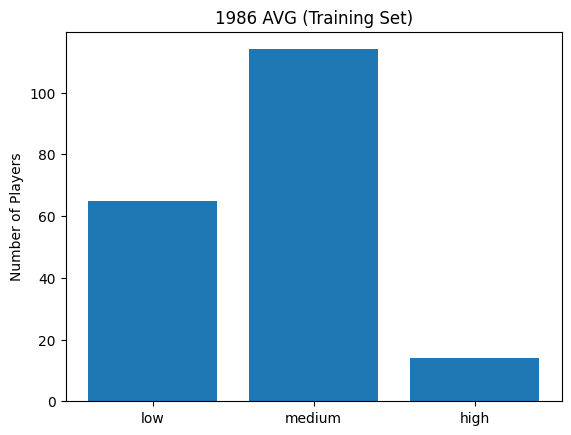

In [65]:
plt.bar(range(len(indexMap)),reordered_list) 

plt.title("1986 AVG (Training Set)")
plt.ylabel("Number of Players")

plt.xticks(range(len(indexMap)), indexMap)

plt.show()

### Did we use the depth method or width method for creating these bins? Explain.

#fillin Type your answer here

We used the width method because our bins are are partitioned by the size of the intervals between them and not the number of samples in each. The high bin clearly has much fewer samples than the other two.